In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250527.csv")
df

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0
...,...,...,...,...,...,...,...
1913,19/01/2023,11337,8671,262,14881,0,66.0
1914,16/08/2023,16791,11800,387,20936,4684,113.0
1915,10/01/2022,5732,3548,73,6644,0,25.0
1916,04/05/2020,3717,1952,70,4411,131,19.0


In [6]:
df.isna()


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1913,False,False,False,False,False,False,False
1914,False,False,False,False,False,False,False
1915,False,False,False,False,False,False,False
1916,False,False,False,False,False,False,False


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Other').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Other')):
  _plot_series(series, series_name, i)
  fig.legend(title='Other', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

In [7]:
df.isna().sum()


,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


In [8]:
df["Other"].dropna()


,Other
0,59.0
1,61.0
2,13.0
3,48.0
4,11.0
...,...
1913,66.0
1914,113.0
1915,25.0
1916,19.0


In [9]:
df["Other"]


,Other
0,59.0
1,61.0
2,13.0
3,48.0
4,11.0
...,...
1913,66.0
1914,113.0
1915,25.0
1916,19.0


In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Other'] = df['Other'].fillna(0)
service_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
df['Total'] = df[service_cols].sum(axis=1)
df = df.sort_values('Date')
df = df.reset_index(drop=True)
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total
0,2019-07-01,15987,9962,407,21223,3715,0.0,51294.0
1,2019-07-02,16895,10656,409,21715,3993,0.0,53668.0
2,2019-07-03,16613,10658,427,22025,3638,0.0,53361.0
3,2019-07-04,16604,10445,437,21868,3576,0.0,52930.0
4,2019-07-05,16040,10532,400,20697,2856,0.0,50525.0


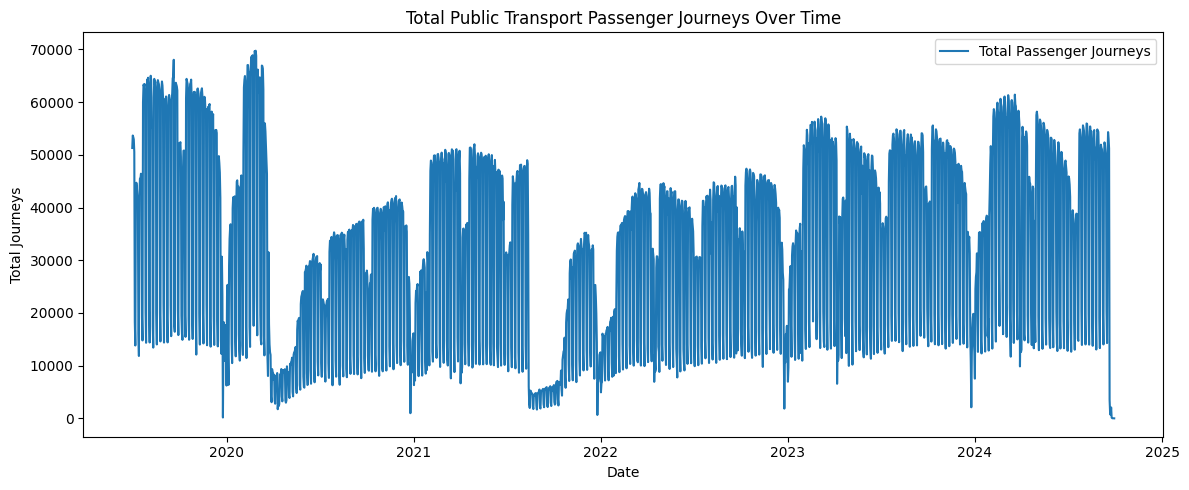

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Total'], label='Total Passenger Journeys')
plt.xlabel('Date')
plt.ylabel('Total Journeys')
plt.title('Total Public Transport Passenger Journeys Over Time')
plt.legend()
plt.tight_layout()
plt.show()

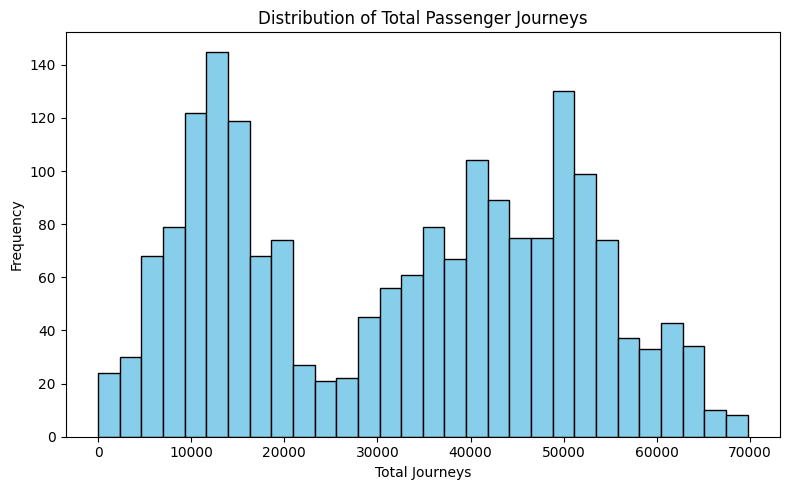

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(df['Total'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Total Journeys')
plt.ylabel('Frequency')
plt.title('Distribution of Total Passenger Journeys')
plt.tight_layout()
plt.show()

Correlation of each service type with Total journeys:
Local Route     0.990457
Rapid Route     0.986948
Light Rail      0.955443
Peak Service    0.940254
School          0.837976
Other           0.443281
Name: Total, dtype: float64


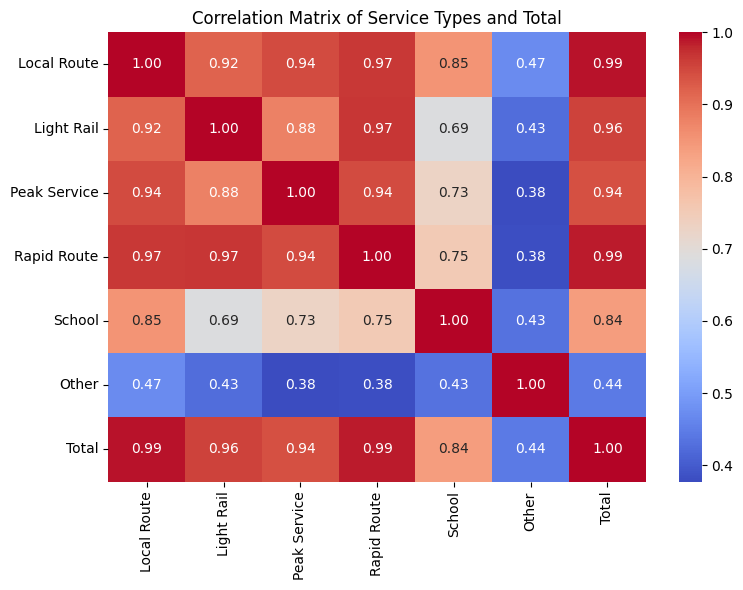

In [13]:
corr_matrix = df[service_cols + ['Total']].corr()


feature_importance = corr_matrix['Total'].drop('Total').sort_values(ascending=False)
print("Correlation of each service type with Total journeys:")
print(feature_importance)


plt.figure(figsize=(8, 6))
plt.title("Correlation Matrix of Service Types and Total")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()